# Step 2: Analysis data and identify patterns

## Identifying Leading Countries

### Disclaimer

While differences in IQ scores across countries are sometimes attributed to cultural biases in testing, extensive research has been conducted to mitigate such concerns. Carefully designed assessments that aim to eliminate cultural bias — such as tests based on spatial reasoning (using only visual patterns), digit span memory tasks, and pure eye-hand reaction time measurements - have shown results that align closely with traditional IQ tests.

Moreover, if IQ tests inherently reflected the cultural biases of their creators — predominantly from the UK and the USA — it would be unexpected for East Asian populations, representing vastly different cultural backgrounds, to consistently outperform these Western nations. This observation suggests that IQ tests, when designed rigorously and objectively, can provide meaningful insights into cognitive performance across diverse populations.

Import packages

In [133]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objs as go
import plotly.offline as pyo
import plotly.express as px
import plotly.io as pio
import geopandas as gpd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr

import pandas as pd

In [134]:
# Load DataFrame from pickle file
df = pd.read_pickle('data.pkl')
df.head()

df_2002 = pd.read_pickle('data_2002.pkl')
df_2002.head()

,Rank,Country,Average IQ
0,1,Hong Kong,108
1,1,Singapore,108
2,2,South Korea,106
3,3,Japan,105
4,3,China,105


Define columns

In [135]:
AverageIQColName = 'Average IQ'
GNI_2021ColName = 'GNI - 2021'
HDI_2021ColName = 'HDI (2021)'
Literacy_RateColName = 'Literacy Rate'
Schooling_2021ColName = 'Mean years of schooling - 2021'
Nobel_PrizesColName = 'Nobel Prizes'
CountryColName = 'Country'
Population_2023ColName = 'Population - 2023'

Top-10 countries with the highest IQ:
        Country  Average IQ
0         Japan      106.48
1        Taiwan      106.47
3     Hong Kong      105.37
4         China      104.10
5   South Korea      102.35
6       Belarus      101.60
7       Finland      101.20
9       Germany      100.74
10  Netherlands      100.74
11      Estonia      100.72

Top-10 countries with the highest HDI:
        Country  HDI (2021)
28       Norway       0.961
24      Iceland       0.959
3     Hong Kong       0.952
16    Australia       0.951
25      Denmark       0.948
29       Sweden       0.947
9       Germany       0.942
10  Netherlands       0.941
7       Finland       0.940
22  New Zealand       0.937


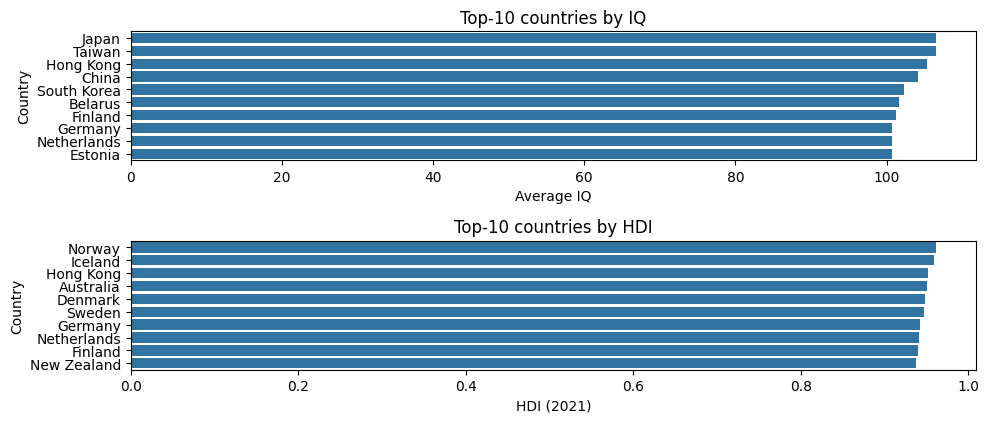

In [136]:
# Identifying Leading Countries
print("Top-10 countries with the highest IQ:")
print(df[[CountryColName, AverageIQColName]].nlargest(10, AverageIQColName))

print("\nTop-10 countries with the highest HDI:")
print(df[[CountryColName, HDI_2021ColName]].nlargest(10, HDI_2021ColName))

# Visualization of leaders
plt.figure(figsize=(10, 6))

# Top-10 countries by IQ
plt.subplot(3, 1, 1)
sns.barplot(x=AverageIQColName, y=CountryColName, data=df.nlargest(10, AverageIQColName))
plt.title('Top-10 countries by IQ')

# Top-10 countries by HDI
plt.subplot(3, 1, 2)
sns.barplot(x=HDI_2021ColName, y=CountryColName, data=df.nlargest(10, HDI_2021ColName))
plt.title('Top-10 countries by HDI')

plt.tight_layout()
plt.show()

Country with Nobel Prizes

Top-10 countries by the number of Nobel laureates:
           Country  Nobel Prizes
27   United States           400
19  United Kingdom           137
9          Germany           111
30          France            71
29          Sweden            32
0            Japan            29
15          Canada            28
10     Netherlands            22
23         Austria            22
40           Italy            21


Text(0.5, 1.0, 'Top-10 countries by the number of Nobel laureates')

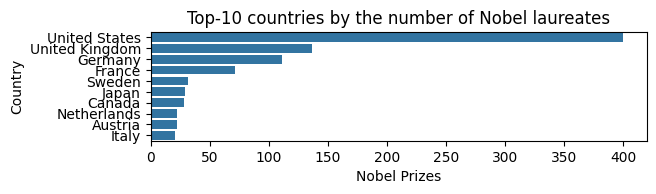

In [137]:
# Identifying Countries with Nobel laureates
print("Top-10 countries by the number of Nobel laureates:")
print(df[[CountryColName, Nobel_PrizesColName]].nlargest(10, Nobel_PrizesColName))

# Top-10 countries by Nobel laureates
plt.subplot(3, 1, 3)
sns.barplot(x=Nobel_PrizesColName, y=CountryColName, data=df.nlargest(10, Nobel_PrizesColName))
plt.title('Top-10 countries by the number of Nobel laureates')

According to the analysis, United States has 400 prizes, United Kingdom has 37 and Germany has 111 Nobel laureates.

Country with the lowest rates

Top-10 countries with the lowest IQ:
             Country  Average IQ
192            Nepal       42.99
190          Liberia       45.07
191     Sierra Leone       45.07
189        Guatemala       47.72
188           Gambia       52.68
187        Nicaragua       52.69
186           Guinea       53.48
184            Ghana       58.16
185  Costa do Marfim       58.16
183      South Sudan       58.61

Top-10 countries with the lowest HDI:
                      Country  HDI (2021)
183               South Sudan       0.385
119                      Chad       0.394
150                     Niger       0.400
178  Central African Republic       0.404
149                   Burundi       0.426
181                      Mali       0.428
148                Mozambique       0.446
146              Burkina Faso       0.449
176                     Yemen       0.455
186                    Guinea       0.465


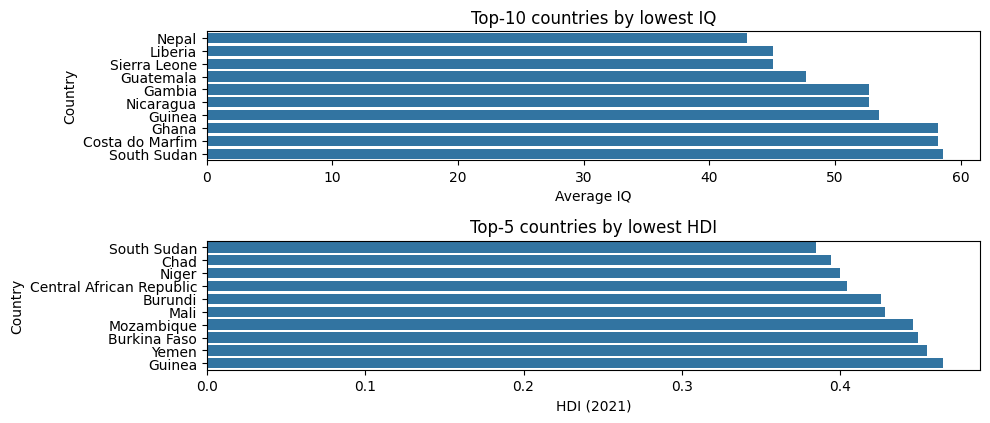

In [138]:
# Identifying Countries with negative scores
print("Top-10 countries with the lowest IQ:")
print(df[[CountryColName, AverageIQColName]].nsmallest(10, AverageIQColName))

print("\nTop-10 countries with the lowest HDI:")
print(df[[CountryColName, HDI_2021ColName]].nsmallest(10, HDI_2021ColName))

# Visualization
plt.figure(figsize=(10, 6))

# Top-10 countries by IQ
plt.subplot(3, 1, 1)
sns.barplot(x=AverageIQColName, y=CountryColName, data=df.nsmallest(10, AverageIQColName))
plt.title('Top-10 countries by lowest IQ')

# Top-10 countries by HDI
plt.subplot(3, 1, 2)
sns.barplot(x='HDI (2021)', y=CountryColName, data=df.nsmallest(10, HDI_2021ColName))
plt.title('Top-5 countries by lowest HDI')

plt.tight_layout()
plt.show()

## Visualization of IQ distribution across continents

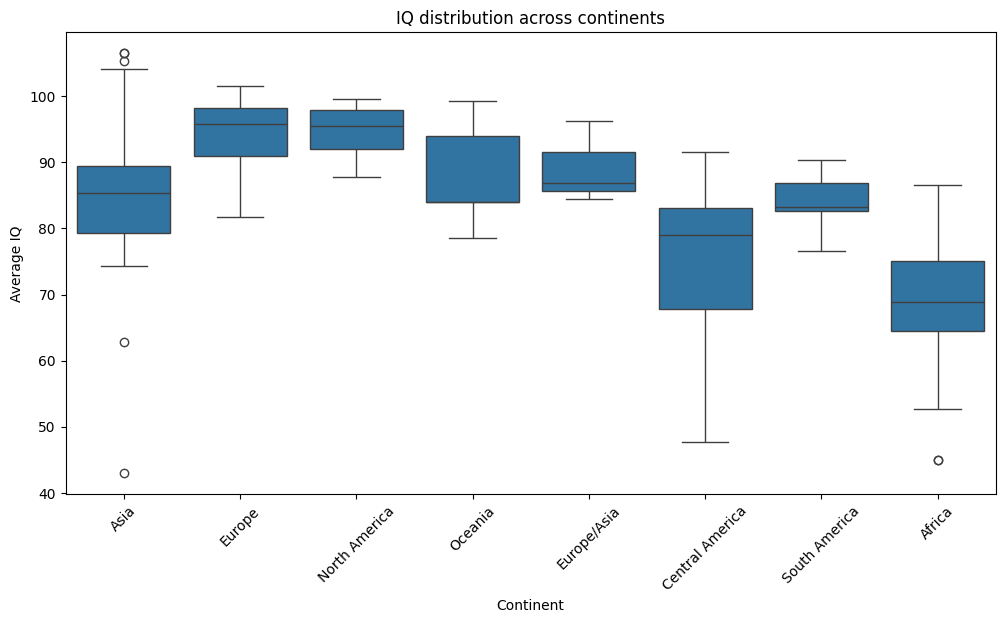

In [139]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Continent', y=AverageIQColName, data=df)
plt.title('IQ distribution across continents')
plt.xticks(rotation=45)
plt.show()

### Creating barchart with the highest and lowest IQ countries in each continent 

In [140]:
# Create an empty list to store the highest and lowest IQ countries in each continent
highest_lowest_iq = []

# Loop through each continent to find the countries with the highest and lowest IQ
for continent in df['Continent'].unique():
    continent_data = df[df['Continent'] == continent]
    
    # Find the country with the highest IQ
    highest_iq_country = continent_data.loc[continent_data[AverageIQColName].idxmax()]
    
    # Find the country with the lowest IQ
    lowest_iq_country = continent_data.loc[continent_data[AverageIQColName].idxmin()]
    
    highest_lowest_iq.append({
        'Continent': continent,
        'Highest Country': highest_iq_country[CountryColName],
        'Highest IQ': highest_iq_country[AverageIQColName],
        'Lowest Country': lowest_iq_country[CountryColName],
        'Lowest IQ': lowest_iq_country[AverageIQColName]
    })

# Convert the list into a DataFrame
highest_lowest_iq_df = pd.DataFrame(highest_lowest_iq)

# Create the figure
fig = go.Figure()

# Add bars for the highest IQ countries (soft green color)
fig.add_trace(go.Bar(
    x=highest_lowest_iq_df['Continent'],
    y=highest_lowest_iq_df['Highest IQ'],
    name='Highest IQ',
    marker=dict(color='lightblue'),
    text=highest_lowest_iq_df['Highest Country'],  # Show country names as hover text
    hoverinfo='text+y'  # Display country name and IQ value on hover
))

# Add bars for the lowest IQ countries (soft red color)
fig.add_trace(go.Bar(
    x=highest_lowest_iq_df['Continent'],
    y=highest_lowest_iq_df['Lowest IQ'],
    name='Lowest IQ',
    marker=dict(color='lightyellow'),
    text=highest_lowest_iq_df['Lowest Country'],  # Show country names as hover text
    hoverinfo='text+y'  # Display country name and IQ value on hover
))

# Update the layout
fig.update_layout(
    title="Country with Highest and Lowest IQ in Each Continent",
    xaxis_title="Continent",
    yaxis_title="Average IQ",
    barmode='group',  # Group the bars together
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(color='black'),
    legend_title="IQ Rank"
)

# Show the figure
pyo.init_notebook_mode(connected=True)
pyo.iplot(fig)


In [141]:
# Filter for Europe and Asia
df_europe = df[df['Continent'] == 'Europe'].nlargest(5, AverageIQColName)
df_asia = df[df['Continent'] == 'Asia'].nlargest(5, AverageIQColName)

fig = go.Figure()

# Top-5 for Europe
fig.add_trace(go.Bar(
    x=df_europe[CountryColName],
    y=df_europe[AverageIQColName],
    name='Top 5 IQ in Europe',
    marker=dict(color='lightblue'),
    text=df_europe[AverageIQColName],  
    hoverinfo='text+y'
))

# Top-5 for Asia
fig.add_trace(go.Bar(
    x=df_asia[CountryColName],
    y=df_asia[AverageIQColName],
    name='Top 5 IQ in Asia',
    marker=dict(color='lightyellow'),
    text=df_asia[AverageIQColName],  
    hoverinfo='text+y'
))

# Build Top-5 Europe and Asia
fig.update_layout(
    title="Top 5 Highest IQ Countries in Europe and Asia",
    xaxis_title="Country",
    yaxis_title="Average IQ",
    barmode='group', 
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(color='black'),
    legend_title="Region"
)

pyo.init_notebook_mode(connected=True)
pyo.iplot(fig)


## Сorrelation analysis

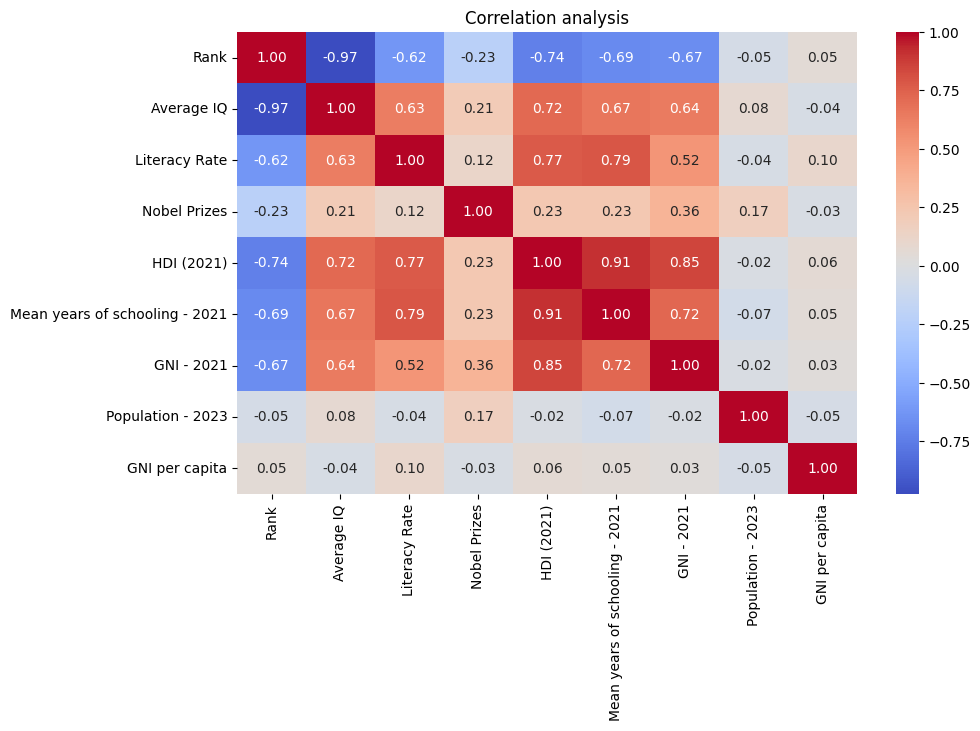

In [142]:
# Filter only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Сorrelation analysis')
plt.show()



Positive Correlation (Values close to +1): When two variables have a correlation coefficient close to +1, they are positively correlated, meaning as one variable increases, the other tends to increase as well.
Negative Correlation (Values close to -1): A negative correlation means that as one variable increases, the other tends to decrease.

## Analysis of Hypothesis


Hypothesis 1: Countries with higher literacy rates tend to have higher average IQs.

Rationale: Literacy is a fundamental skill, and higher literacy rates may correlate with improved cognitive abilities and educational outcomes.

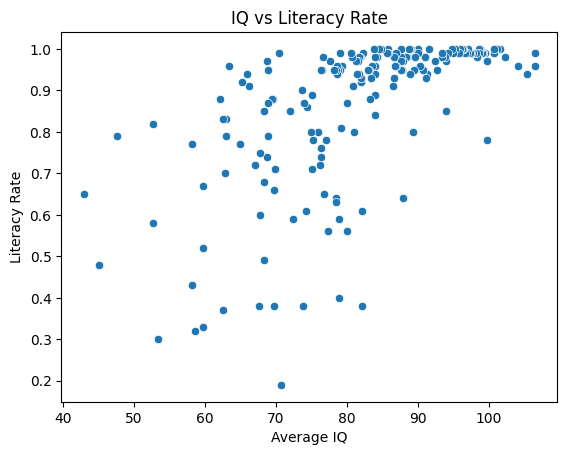

In [143]:
sns.scatterplot(x=AverageIQColName, y=Literacy_RateColName, data=df)
plt.title('IQ vs Literacy Rate')
plt.show()


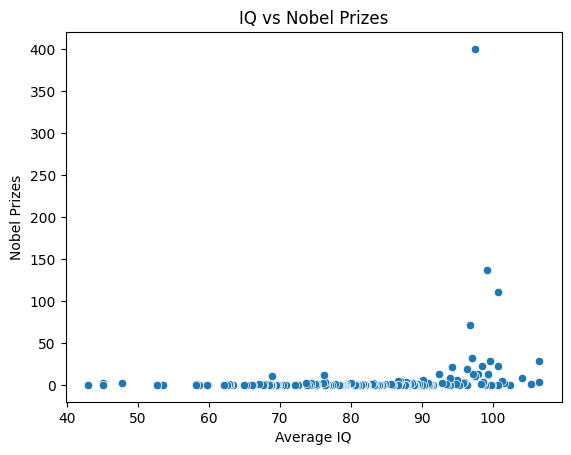

In [144]:
sns.scatterplot(x=AverageIQColName, y=Nobel_PrizesColName, data=df)
plt.title('IQ vs Nobel Prizes')
plt.show()

Hypothesis 2: Countries with higher mean years of schooling have higher average IQs.
Rationale: More years in education may contribute to enhanced cognitive skills and intellectual development.

Hypothesis 3: Countries with a higher HDI (Human Development Index) have more Nobel Prize winners.
Rationale: HDI reflects factors like education, income, and healthcare - key contributors to innovation and academic achievement.

Hypothesis 4: Countries with higher GNI (Gross National Income) are more likely to have Nobel Prize winners.
Rationale: Wealthier countries may invest more in research, education, and innovation, creating an environment conducive to Nobel-worthy achievements.

Hypothesis 5: Countries with larger populations have more Nobel Prize winners.
Rationale: Larger populations provide a larger talent pool, increasing the probability of having individuals who excel academically or scientifically.

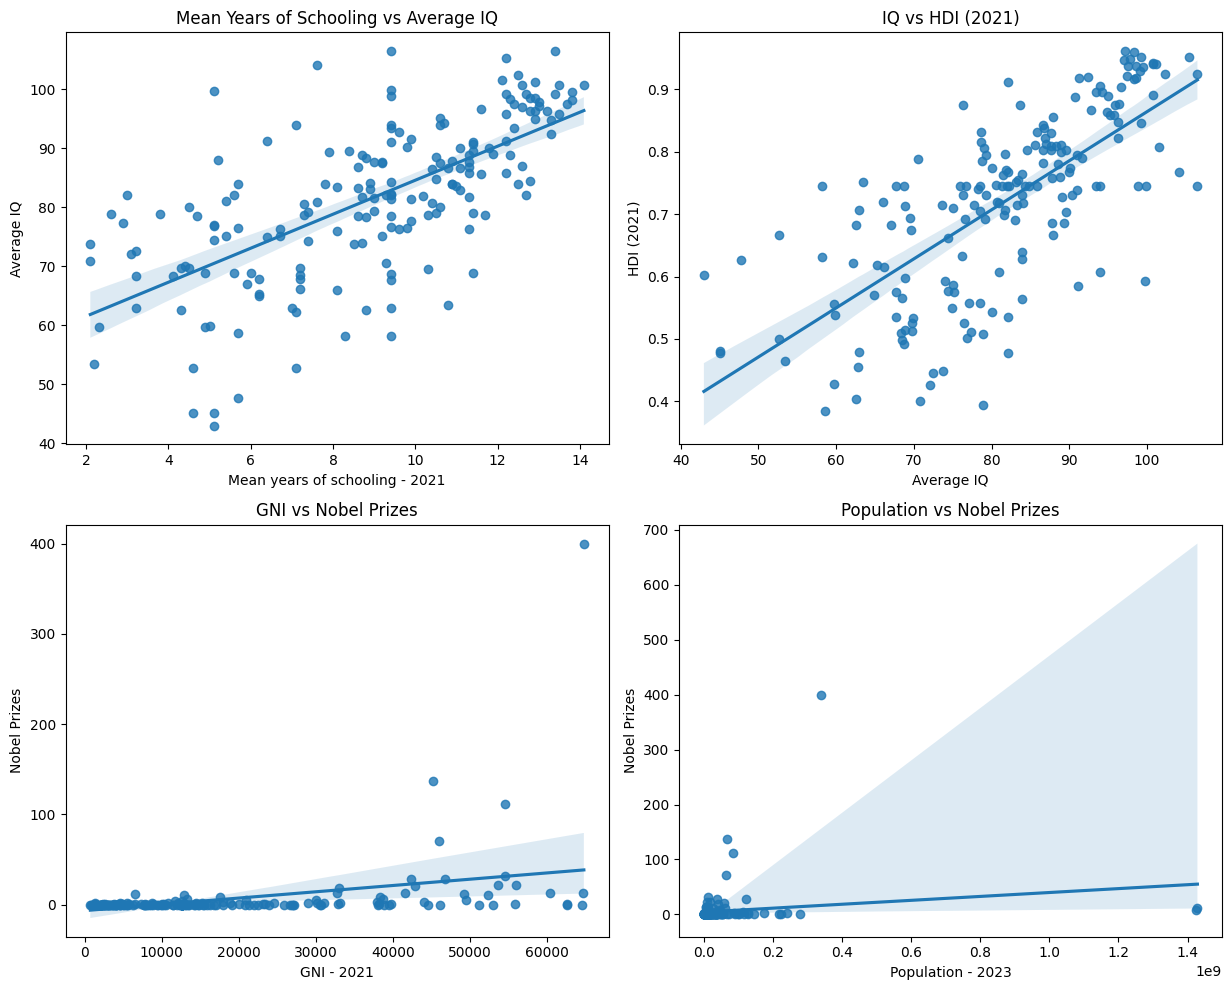

In [145]:
# Check hypothesis 
plt.figure(figsize=(18, 10))

# Mean Years of Schooling vs Average IQ
plt.subplot(2, 3, 2)
sns.regplot(x=Schooling_2021ColName, y=AverageIQColName, data=df)
plt.title('Mean Years of Schooling vs Average IQ')

# IQ vs HDI (2021)
plt.subplot(2, 3, 3)
sns.regplot(x=AverageIQColName, y=HDI_2021ColName, data=df)
plt.title('IQ vs HDI (2021)')

# GNI vs Nobel Prizes
plt.subplot(2, 3, 5)
sns.regplot(x=GNI_2021ColName, y=Nobel_PrizesColName, data=df)
plt.title('GNI vs Nobel Prizes')

# Population vs Nobel Prizes
plt.subplot(2, 3, 6)
sns.regplot(x=Population_2023ColName, y=Nobel_PrizesColName, data=df)
plt.title('Population vs Nobel Prizes')

plt.tight_layout()
plt.show()

Hypothesis 6: Countries ranked higher (closer to 1) tend to have better socio-economic indicators such as HDI, GNI, and Mean Years of Schooling.
Rationale: Higher-ranked countries are often associated with stronger education systems, economies, and quality of life.

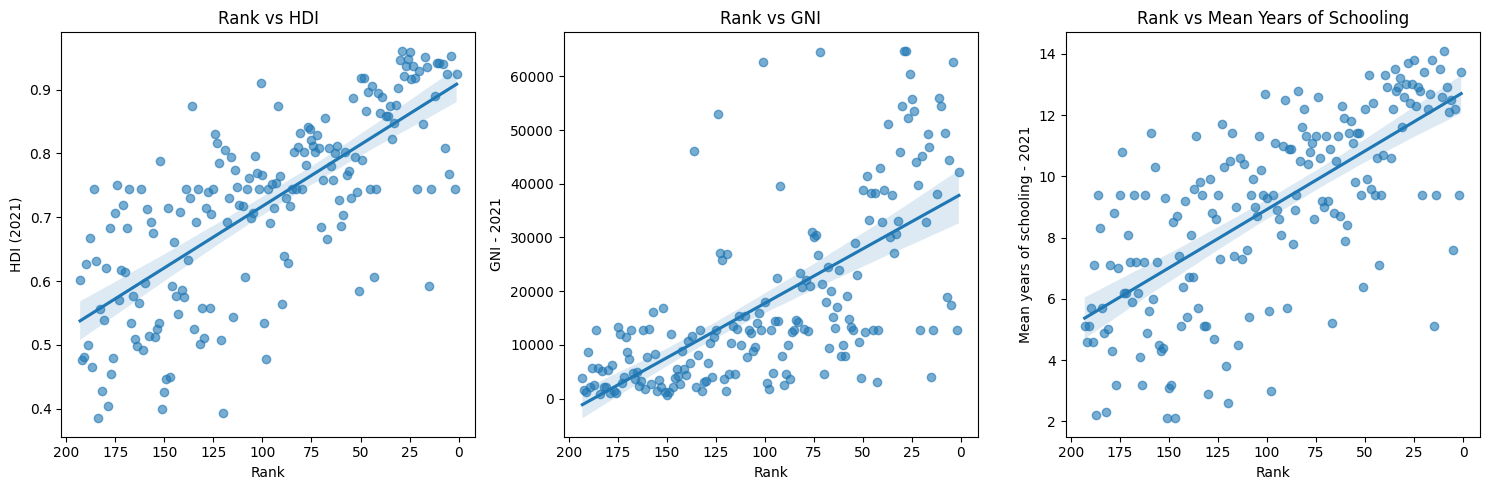

In [146]:
#check hypothesis 
plt.figure(figsize=(15, 5))

# Rank vs HDI
plt.subplot(1, 3, 1)
sns.regplot(x='Rank', y=HDI_2021ColName, data=df, scatter_kws={'alpha':0.6})
plt.gca().invert_xaxis()  # Invert Rank for better intuition
plt.title('Rank vs HDI')

# Rank vs GNI
plt.subplot(1, 3, 2)
sns.regplot(x='Rank', y=GNI_2021ColName, data=df, scatter_kws={'alpha':0.6})
plt.gca().invert_xaxis()
plt.title('Rank vs GNI')

# Rank vs Mean Years of Schooling
plt.subplot(1, 3, 3)
sns.regplot(x='Rank', y=Schooling_2021ColName, data=df, scatter_kws={'alpha':0.6})
plt.gca().invert_xaxis()
plt.title('Rank vs Mean Years of Schooling')

plt.tight_layout()
plt.show()


Hypothesis 7: Country with higher GNI per capita tend to have better score of Average IQ

                GNI per capita  Average IQ
GNI per capita        1.000000   -0.041157
Average IQ           -0.041157    1.000000


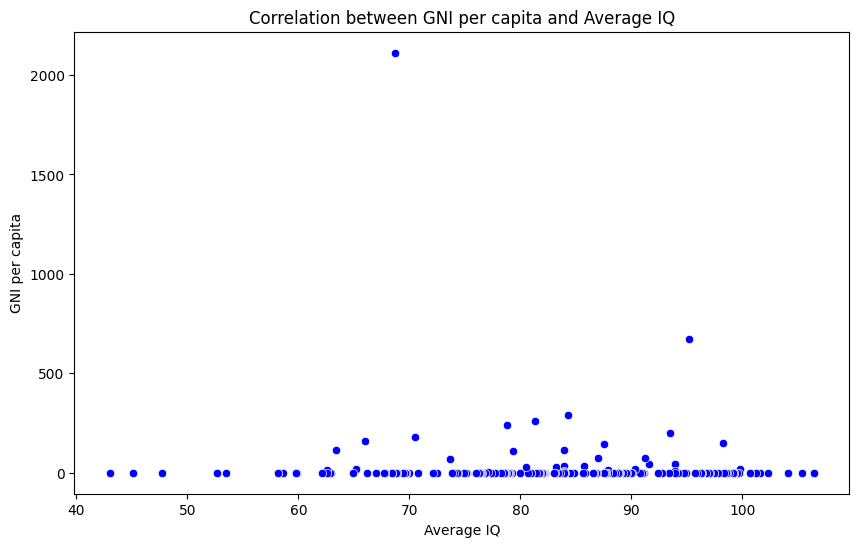

In [147]:
# Correlation between GNI per capita and Average IQ
correlation_matrix = df[['GNI per capita', AverageIQColName]].corr()
print(correlation_matrix)

# GNI per capita vs Average IQ
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=AverageIQColName, y='GNI per capita', color='blue')
plt.title('Correlation between GNI per capita and Average IQ')
plt.xlabel('Average IQ')
plt.ylabel('GNI per capita')
plt.show() 



Hypothesis 8: Over the past two decades, the global average IQ has increased due to improvements in education, access to information, and better living conditions.

In [148]:
merged_df = pd.merge(df[[CountryColName, AverageIQColName]], df_2002[[CountryColName, AverageIQColName]], on='Country', how='inner')
print(merged_df)
merged_df = merged_df.rename(columns={'Average IQ_x': 'IQ_2023', 'Average IQ_y': 'IQ_2002'})

print(merged_df)

          Country  Average IQ_x  Average IQ_y
0           Japan        106.48           105
1          Taiwan        106.47           104
2       Hong Kong        105.37           108
3           China        104.10           105
4     South Korea        102.35           106
..            ...           ...           ...
158     Nicaragua         52.69            81
159     Guatemala         47.72            79
160       Liberia         45.07            67
161  Sierra Leone         45.07            91
162         Nepal         42.99            78

[163 rows x 3 columns]
          Country  IQ_2023  IQ_2002
0           Japan   106.48      105
1          Taiwan   106.47      104
2       Hong Kong   105.37      108
3           China   104.10      105
4     South Korea   102.35      106
..            ...      ...      ...
158     Nicaragua    52.69       81
159     Guatemala    47.72       79
160       Liberia    45.07       67
161  Sierra Leone    45.07       91
162         Nepal    42.99  

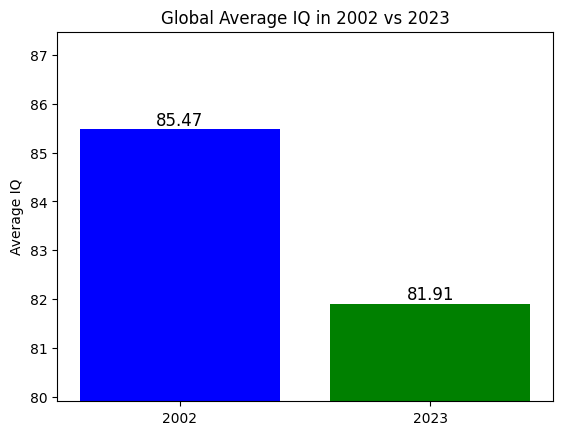

In [149]:
# Calculate the average IQ for 2002 and 2023
mean_iq_2002 = merged_df['IQ_2002'].mean()
mean_iq_2023 = merged_df['IQ_2023'].mean()

# Create a bar chart
plt.bar(['2002', '2023'], [mean_iq_2002, mean_iq_2023], color=['blue', 'green'])
plt.ylabel('Average IQ')
plt.title('Global Average IQ in 2002 vs 2023')
plt.ylim(min(mean_iq_2002, mean_iq_2023) - 2, max(mean_iq_2002, mean_iq_2023) + 2)

# Display the exact values on the bars
plt.text('2002', mean_iq_2002, f'{mean_iq_2002:.2f}', ha='center', va='bottom', fontsize=12, color='black')
plt.text('2023', mean_iq_2023, f'{mean_iq_2023:.2f}', ha='center', va='bottom', fontsize=12, color='black')

# Display the chart
plt.show()


The data shows that the global average IQ has decreased from 85.47 in 2002 to 81.91 in 2023. This contradicts hypothesis, which suggested an increase in IQ due to better education, access to information, and improved living conditions. 

Visualization of changes among the top-ranking countries over the past 20 years

In [150]:
# Top 5 countries with the highest IQ in 2002 and 2023
top_5_2002 = merged_df.nlargest(5, 'IQ_2002')[[CountryColName, 'IQ_2002']]
top_5_2023 = merged_df.nlargest(5, 'IQ_2023')[[CountryColName, 'IQ_2023']]

# Top 5 countries with the lowest IQ in 2002 and 2023
bottom_5_2002 = merged_df.nsmallest(5, 'IQ_2002')[[CountryColName, 'IQ_2002']]
bottom_5_2023 = merged_df.nsmallest(5, 'IQ_2023')[[CountryColName, 'IQ_2023']]

# Display results
print("Top 5 countries with the highest IQ in 2002:")
print(top_5_2002)

print("\nTop 5 countries with the highest IQ in 2023:")
print(top_5_2023)

print("\nTop 5 countries with the lowest IQ in 2002:")
print(bottom_5_2002)

print("\nTop 5 countries with the lowest IQ in 2023:")
print(bottom_5_2023)


Top 5 countries with the highest IQ in 2002:
       Country  IQ_2002
2    Hong Kong      108
4  South Korea      106
0        Japan      105
3        China      105
1       Taiwan      104

Top 5 countries with the highest IQ in 2023:
       Country  IQ_2023
0        Japan   106.48
1       Taiwan   106.47
2    Hong Kong   105.37
3        China   104.10
4  South Korea   102.35

Top 5 countries with the lowest IQ in 2002:
         Country  IQ_2002
124  Saint Lucia       62
125   Mozambique       64
140     Cameroon       64
148        Gabon       64
82         Haiti       67

Top 5 countries with the lowest IQ in 2023:
          Country  IQ_2023
162         Nepal    42.99
160       Liberia    45.07
161  Sierra Leone    45.07
159     Guatemala    47.72
158     Nicaragua    52.69


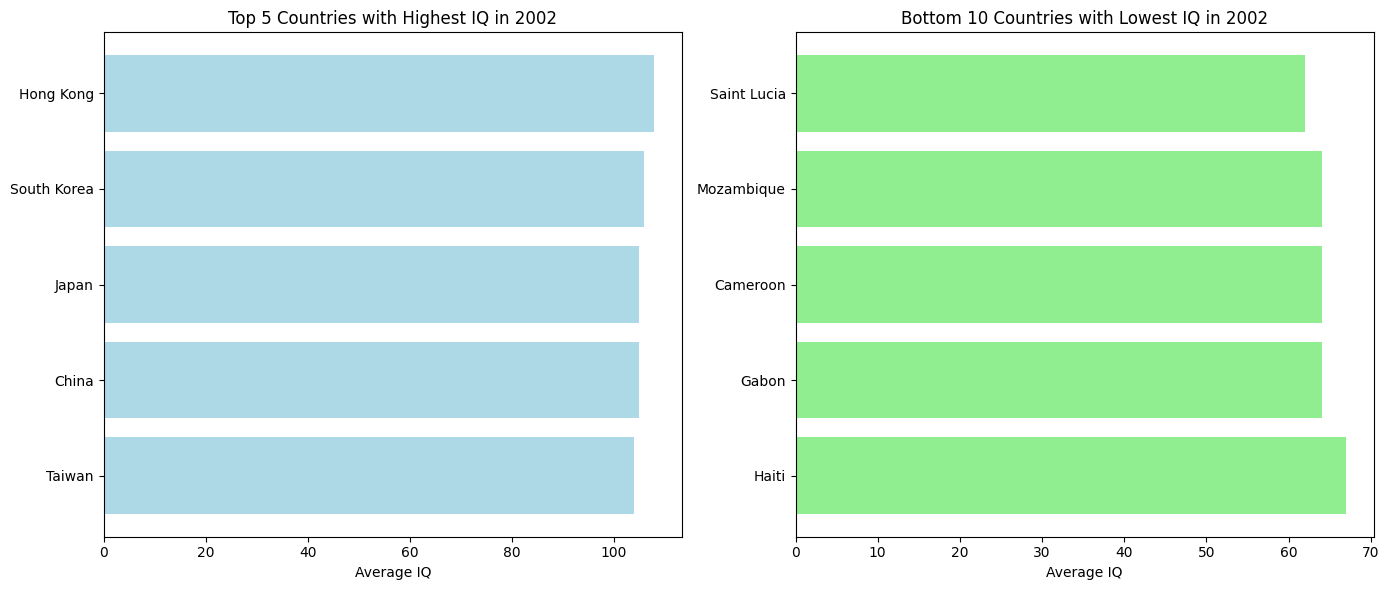

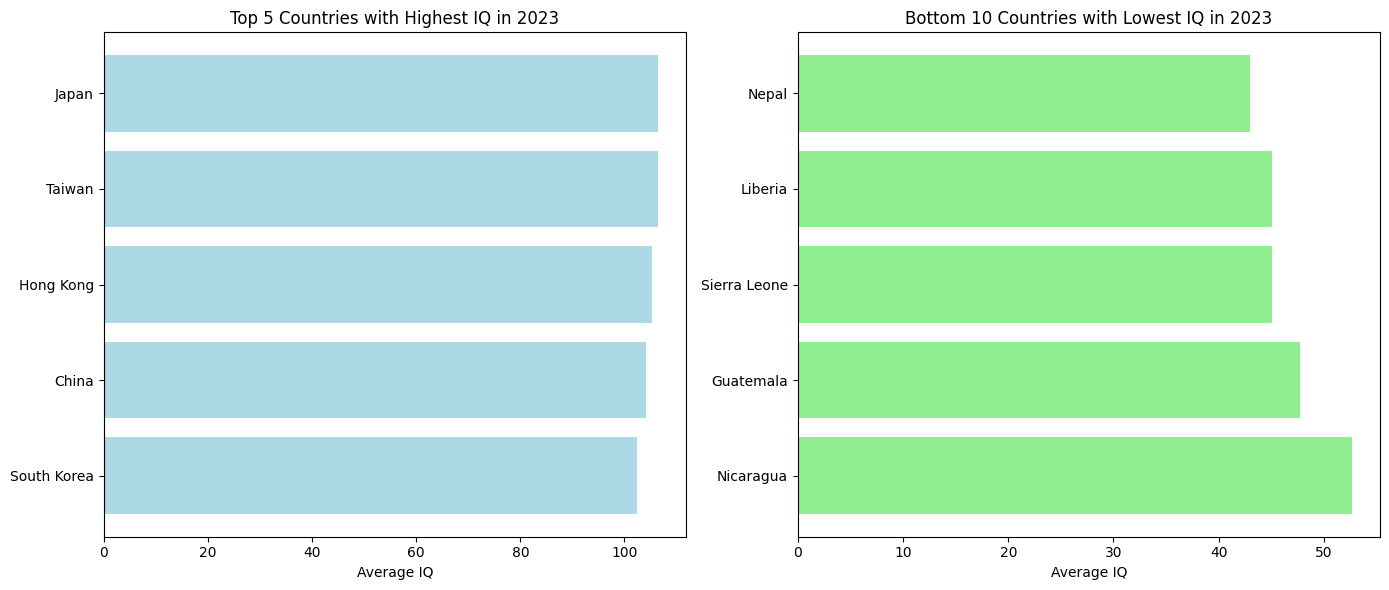

In [151]:
# Build visualisation 
def plot_top_bottom(top, bottom, year):
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    # Top-5 countries
    ax[0].barh(top[CountryColName], top[f'IQ_{year}'], color='lightblue')
    ax[0].set_xlabel(AverageIQColName)
    ax[0].set_title(f'Top 5 Countries with Highest IQ in {year}')
    ax[0].invert_yaxis()  

    # Lowest countries
    ax[1].barh(bottom[CountryColName], bottom[f'IQ_{year}'], color='lightgreen')
    ax[1].set_xlabel(AverageIQColName)
    ax[1].set_title(f'Bottom 10 Countries with Lowest IQ in {year}')
    ax[1].invert_yaxis()

    plt.tight_layout()
    plt.show()

plot_top_bottom(top_5_2002, bottom_5_2002, 2002)
plot_top_bottom(top_5_2023, bottom_5_2023, 2023)


Top IQ Countries:
Japan (106.48) and Taiwan (106.47) now lead, while Hong Kong and Singapore saw slight declines.
South Korea dropped out of the top 5, replaced by Taiwan.
Lowest IQ Countries:

IQ scores at the lower end have declined significantly.
Sierra Leone and Liberia (45.07) now have the lowest IQs, a sharp drop from 2002’s lowest (62).

In [152]:
# Filter Top-5 for Europe and Asia
df_europe_2023 = df[df['Continent'] == 'Europe'].nlargest(5, AverageIQColName)
df_asia_2023 = df[df['Continent'] == 'Asia'].nlargest(5, AverageIQColName)

# Compare with 2002
df_europe_2002 = df_2002[df_2002[CountryColName].isin(df_europe_2023[CountryColName])]
df_asia_2002 = df_2002[df_2002[CountryColName].isin(df_asia_2023[CountryColName])]

fig = go.Figure()

# Top-5 IQ in Europe (2023)
fig.add_trace(go.Bar(
    x=df_europe_2023[CountryColName],
    y=df_europe_2023[AverageIQColName],
    name='Top 5 IQ in Europe (2023)',
    marker=dict(color='lightblue'),
    text=df_europe_2023[AverageIQColName],  
    hoverinfo='text+y'
))

# Top-5 IQ in Europe (2002)
fig.add_trace(go.Bar(
    x=df_europe_2002[CountryColName],
    y=df_europe_2002[AverageIQColName],
    name='Top 5 IQ in Europe (2002)',
    marker=dict(color='blue'),
    text=df_europe_2002[AverageIQColName],  
    hoverinfo='text+y'
))

# Top-5 in Asia (2023)
fig.add_trace(go.Bar(
    x=df_asia_2023[CountryColName],
    y=df_asia_2023[AverageIQColName],
    name='Top 5 IQ in Asia (2023)',
    marker=dict(color='Lightgreen'),
    text=df_asia_2023[AverageIQColName],  
    hoverinfo='text+y'
))

# Top-5 in Asia (2002)
fig.add_trace(go.Bar(
    x=df_asia_2002[CountryColName],
    y=df_asia_2002[AverageIQColName],
    name='Top 5 IQ in Asia (2002)',
    marker=dict(color='green'),
    text=df_asia_2002[AverageIQColName],  
    hoverinfo='text+y'
))

# Create visualisation
fig.update_layout(
    title="Top 5 Highest IQ Countries in Europe and Asia (2023 vs 2002)",
    xaxis_title=CountryColName,
    yaxis_title=AverageIQColName,
    barmode='group', 
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(color='black'),
    legend_title="Region & Year"
)

pyo.init_notebook_mode(connected=True)
pyo.iplot(fig)


### Creating scatter plots with continent visualisation

In [153]:
# Scatter plot for Average IQ vs Literacy Rate
fig1 = px.scatter(df, x=Literacy_RateColName, y=AverageIQColName,
                  title='Average IQ vs Literacy Rate',
                  labels={Literacy_RateColName: 'Literacy Rate (%)', AverageIQColName: AverageIQColName},
                  color='Continent',  # You can add color by continent to better visualize patterns
                  color_continuous_scale='Viridis')

# Scatter plot for Average IQ vs Mean Years of Schooling
fig2 = px.scatter(df, x=Schooling_2021ColName, y=AverageIQColName,
                  title='Average IQ vs Mean Years of Schooling (2021)',
                  labels={Schooling_2021ColName: 'Mean Years of Schooling', AverageIQColName: AverageIQColName},
                  color='Continent', 
                  color_continuous_scale='Viridis')

# Scatter plot for Average IQ vs HDI (2021)
fig3 = px.scatter(df, x=HDI_2021ColName, y=AverageIQColName,
                  title='Average IQ vs HDI (2021)',
                  labels={HDI_2021ColName: 'Human Development Index (2021)', AverageIQColName: AverageIQColName},
                  color='Continent', 
                  color_continuous_scale='Viridis')

# Show the plots
fig1.show()
fig2.show()
fig3.show()


For all continents, the following trend is visualized: The higher the literacy rate, HDI, and years of schooling, the higher the IQ results.

### Creating a choropleth map with IQ level and Rank of Countries 

In [154]:
import pycountry
import geopandas as gpd
import geodatasets

# Assuming df1 is your data with 'Country' and 'Rank'
rank_location = df[[CountryColName, 'Rank', AverageIQColName]]

# Get the ISO alpha-3 code for each country using pycountry
rank_location['ISO_alpha'] = rank_location[CountryColName].apply(
    lambda x: pycountry.countries.get(name=x).alpha_3 if pycountry.countries.get(name=x) else None
)

# Load the Natural Earth shapefile (update with your file path)
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"

world = gpd.read_file(url)

# Merge the shapefile data with the rank data
world = world.merge(rank_location, how='left', left_on='ISO_A3', right_on='ISO_alpha')

# Create a choropleth map
fig = px.choropleth(
    world,
    locations='ISO_A3',
    color=AverageIQColName,
    hover_name=CountryColName, 
    projection="winkel3", 
    color_continuous_scale='Viridis',
    labels={AverageIQColName: AverageIQColName},
    title='Average IQ by Country'
)

# Display the map
fig.show()
fig = px.choropleth(
    world,
    locations='ISO_A3',
    color='Rank',
    hover_name=CountryColName, 
    projection="winkel3", 
    color_continuous_scale='YlOrRd',
    labels={'Rank': 'Rank'},
    title='Rank by Country'
)
fig.show()

/var/folders/bk/c0wwfkw55jz9lxqqqp8p8wr40000gn/T/ipykernel_70482/1164955790.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [155]:
px.choropleth(df, locations= CountryColName, color=Literacy_RateColName,
  color_continuous_scale="geyser",
  projection="winkel3", 
  locationmode="country names",
  scope="world", 
  range_color=(0,1), title='Literacy Rate by country',
  height=750)

# Step 3.  Machine learning implementation

### Prediction national IQ scores

This is a supervised machine learning implementation that predicts national IQ scores based on educational and socio-economic factors (Literacy Rate, schooling and HDI). 

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Data Preparation
X = df[[Literacy_RateColName, Schooling_2021ColName, HDI_2021ColName]]  # Independent variables
y = df[AverageIQColName]  # Dependent variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model performance
print(f'MSE: {mean_squared_error(y_test, y_pred):.2f}')
print(f'R-squared: {r2_score(y_test, y_pred):.2f}')


MSE: 51.32
R-squared: 0.69


The model helps quantify how these three indicators collectively influence cognitive performance at a national level. 

R-squared = 0.69 suggests a moderate-to-strong relationship — this model captures a decent portion of the variance in IQ scores.
MSE = 51.32 shows that individual predictions can still be off, which may impact precision in real-world scenarios.

### Prediction global IQ for 2043

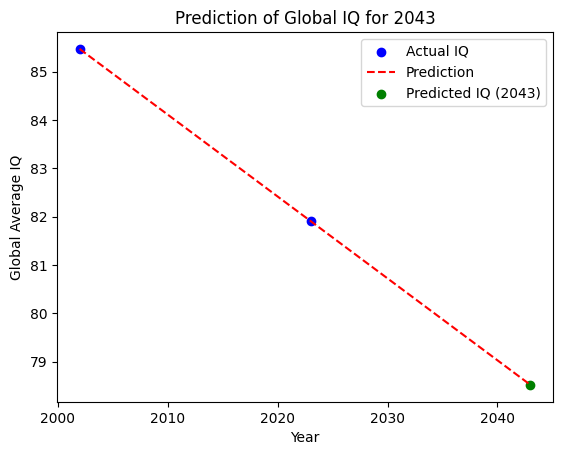

Predicted Global IQ in 2043: 78.52


In [157]:
# Data on the average IQ for 2002 and 2023
years = np.array([2002, 2023]).reshape(-1, 1)
avg_iq = np.array([85.47, 81.91])  # Average IQ for these years

# Training the model
model = LinearRegression()
model.fit(years, avg_iq)

# Prediction for 2043
future_year = np.array([[2043]])
predicted_iq = model.predict(future_year)

# Plotting the graph
plt.scatter(years, avg_iq, color='blue', label='Actual IQ')
plt.plot(np.append(years, future_year), 
         model.predict(np.append(years, future_year).reshape(-1, 1)), 
         color='red', linestyle='dashed', label='Prediction')
plt.scatter(future_year, predicted_iq, color='green', label='Predicted IQ (2043)')
plt.xlabel("Year")
plt.ylabel("Global Average IQ")
plt.title("Prediction of Global IQ for 2043")
plt.legend()
plt.show()

print(f"Predicted Global IQ in 2043: {predicted_iq[0]:.2f}")


Machine learning predictions suggest that by 2043, the global average IQ will drop to 78.52.

### Predicting Required Education and HDI for IQ 100

In [162]:
# create Predicting Required Education and HDI for IQ 100
# Data
X = df[[Literacy_RateColName, Schooling_2021ColName, HDI_2021ColName]]
y = df[AverageIQColName]

# Train the model
model = LinearRegression()
model.fit(X, y)

# Loss function for optimization
def objective(params):
    literacy_rate, schooling, hdi = params
    input_data = pd.DataFrame([[literacy_rate, schooling, hdi]], columns=X.columns)  
    predicted_iq = model.predict(input_data)[0]
    return abs(predicted_iq - target_iq)

# Target IQ
target_iq = 100

# Initial guesses (mean values)
initial_guess = [X[Literacy_RateColName].mean(), X[Schooling_2021ColName].mean(), X[HDI_2021ColName].mean()]

# Constraints
bounds = [(50, 100),  # Literacy Rate (50-100%)
          (5, 15),    # Years of Schooling (5-15 years)
          (0.3, 1)]   # HDI (0.3 - 1)

# Run optimization
result = minimize(objective, initial_guess, bounds=bounds)

# Extract results
optimal_literacy, optimal_schooling, optimal_hdi = result.x
print(f"To achieve an average IQ of {target_iq}:")
print(f"Literacy rate: {optimal_literacy:.2f}%")
print(f"Years of schooling: {optimal_schooling:.2f}")
print(f"Human Development Index (HDI): {optimal_hdi:.3f}")


To achieve an average IQ of 100:
Literacy rate: 50.00%
Years of schooling: 15.00
Human Development Index (HDI): 0.300


This means that, based on the trained machine learning model, for a country to reach an average IQ of 100, at least 50% of the population should be literate, the average person should have completed 15 years of formal education. 

# Step 4. Creating Dashboard

Assessment of how IQ has changed over 20 years in the countries with the highest scores.

Identification of IQ change trends.

In [159]:
import dash
import dash_core_components as dcc
import dash_html_components as html

# Dataset 2023
columns_to_keep = [CountryColName, AverageIQColName, 'Continent']
data_top10_2023 = df.nlargest(10, AverageIQColName)
data_top10_2023 = data_top10_2023[columns_to_keep]
data_top10_2023.head(10)


,Country,Average IQ,Continent
0,Japan,106.48,Asia
1,Taiwan,106.47,Asia
3,Hong Kong,105.37,Asia
4,China,104.10,Asia
5,South Korea,102.35,Asia
6,Belarus,101.60,Europe
7,Finland,101.20,Europe
9,Germany,100.74,Europe
10,Netherlands,100.74,Europe
11,Estonia,100.72,Europe


In [160]:
# Data for 2002 and 2023
data_top10_2002 = df_2002[df_2002[CountryColName].isin(data_top10_2023[CountryColName])]
#print(data_top10_2002.head(10))

IQ_2023_ColName = 'IQ_2023'
IQ_2002_ColName = 'IQ_2002'
IQ_Change_ColName = 'IQ_Change'

# Merge data by country
data_top10 = pd.merge(data_top10_2002, data_top10_2023, on=CountryColName)
data_top10.rename(columns={AverageIQColName+'_x': IQ_2002_ColName, AverageIQColName+'_y': IQ_2023_ColName}, inplace=True)
#print(data_top10.head(10))

# Calculate IQ change
data_top10[IQ_Change_ColName] = data_top10[IQ_2023_ColName] - data_top10[IQ_2002_ColName]
#print(data_top10.head(10))

df_europe = data_top10[data_top10['Continent'] == 'Europe']
df_asia = data_top10[data_top10['Continent'] == 'Asia']

print(df_europe.head(10))
print(df_asia.head(10))

#raise ValueError("Number must be positive!")

# Create Dash application
app = dash.Dash(__name__)

# Dashboard layout
app.layout = html.Div(
    [
    html.H1("Top-10 countries with the highest IQ"),
        dcc.Graph(
        id='top_10_iq',
            figure=px.bar(data_top10, x=CountryColName, y=IQ_2023_ColName,
            title="TOP 10 countries",
                        text=data_top10[IQ_2023_ColName], 
                        color=IQ_2023_ColName, 
                        color_continuous_scale='blues',
                        labels={AverageIQColName: IQ_2023_ColName, CountryColName: CountryColName})
        ),
    html.H1("IQ by Country (2002 vs 2023)"),

    dcc.Graph(
        id='iq_comparison',
        figure=px.bar(data_top10, x=CountryColName, y=[IQ_2002_ColName, IQ_2023_ColName],
                      title="IQ Comparison by Country (2002 vs 2023)",
                      barmode='group', text_auto=True,
                      labels={'value': AverageIQColName, 'variable': 'Year'})
    ),

    # IQ change graph
    dcc.Graph(
        id='iq_change',
        figure=px.bar(data_top10, x=CountryColName, y=IQ_Change_ColName,
                      title="IQ Change between 2002 and 2023",
                      text_auto=True, color=IQ_Change_ColName,
                      color_continuous_scale='viridis',
                      labels={IQ_Change_ColName: 'IQ Difference', CountryColName: CountryColName})
    ),

      # Top-5 European countries by IQ (2023)
    dcc.Graph(
        id='top5_europe',
        figure=px.bar(df_europe, x=CountryColName, y=IQ_2023_ColName,
                      title="Top-5 European Countries by IQ (2023)",
                      text_auto=True, color=IQ_2023_ColName,
                      color_continuous_scale='Blues')
    ),

    # Top-5 Asian countries by IQ (2023)
    dcc.Graph(
        id='top5_asia',
        figure=px.bar(df_asia, x=CountryColName, y=IQ_2023_ColName,
                      title="Top-5 Asian Countries by IQ (2023)",
                      text_auto=True, color=IQ_2023_ColName,
                      color_continuous_scale='Oranges')
    )
   
])

# Run the server
if __name__ == '__main__':
    app.run_server(debug=True, port=8051)


   Rank      Country  IQ_2002  IQ_2023 Continent  IQ_Change
5     7  Netherlands      100   100.74    Europe       0.74
6     8      Estonia       99   100.72    Europe       1.72
7     8      Finland       99   101.20    Europe       2.20
8     8      Germany       99   100.74    Europe       1.74
9    10      Belarus       97   101.60    Europe       4.60
   Rank      Country  IQ_2002  IQ_2023 Continent  IQ_Change
0     1    Hong Kong      108   105.37      Asia      -2.63
1     2  South Korea      106   102.35      Asia      -3.65
2     3        Japan      105   106.48      Asia       1.48
3     3        China      105   104.10      Asia      -0.90
4     4       Taiwan      104   106.47      Asia       2.47


# Conclusion

The correlations observed between IQ scores, literacy rates, years of schooling, HDI, and Nobel Prize counts suggest that socio-economic factors are strongly connected with cognitive abilities at a national level. Higher levels of literacy and education correlate positively with IQ scores, supporting the idea that education plays a pivotal role in intellectual development.

Several hypotheses were analyzed, including the relationships between educational indicators (literacy rate, mean years of schooling) and average IQ scores, as well as the potential impact of HDI and GNI on the number of Nobel Prize winners. While there is a clear positive correlation between education, socio-economic factors, and IQ, some trends, such as a global decrease in average IQ scores, challenge the assumption that intelligence naturally increases with development.

# Recommendations
Focus on Education:
Nations with lower IQ scores and HDI should prioritize improvements in their education systems, as education is a key factor in raising cognitive abilities and overall socio-economic development.

Socio-Economic Investments:
Investing in healthcare, income distribution, and general living conditions is crucial for fostering a more conducive environment for intellectual growth and social progress.

Further Research:
As the global IQ trend continues to show a decline, further research into the underlying causes of this trend and potential interventions is needed. Specifically, exploring the effects of technology, access to information, and global educational practices could provide valuable insights.